In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
#Resampling-Methode
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score as fs
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Datensätzen einlesen

In [78]:
demo=pd.read_csv(r'C:\Users\Emad\Desktop\Studium\masterprojekt\datenbank\kaggle_de_03-01-2021\12.01\archive (24)\demographics_de.csv')
df =pd.read_csv(r'C:\Users\Emad\Desktop\Studium\masterprojekt\datenbank\kaggle_de_03-01-2021\12.01\archive (24)\covid_de.csv')

# Analyse der Datensätze

In [4]:
df.shape

(505230, 8)

In [5]:
n_dataframe,m_dataframe=df.shape
print('Der gesamte Datensatz von Deutschland (letzte Aktaulisierung am 16.01.2021)')
print('Anzahl der features (Spalten) (m): %.0f'%(m_dataframe))
print('Anzahl der Proben (Zeilen) (n): %.0f'%(n_dataframe))
cnt = 0
print('\nFeatures (Spalten): ')
for feature in df.columns:
    cnt += 1
    print('%d. '%(cnt), feature,'\t\t')

Der gesamte Datensatz von Deutschland (letzte Aktaulisierung am 16.01.2021)
Anzahl der features (Spalten) (m): 8
Anzahl der Proben (Zeilen) (n): 505230

Features (Spalten): 
1.  state 		
2.  county 		
3.  age_group 		
4.  gender 		
5.  date 		
6.  cases 		
7.  deaths 		
8.  recovered 		


In [6]:
cov_age = df.groupby(['state']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths"]/cov_age["cases"]* 100,1)
cov_age

state   cases  deaths  recovered  death_percentage
0       Baden-Wuerttemberg  291788    7011     259282               2.4
1                   Bayern  400403   10344     354611               2.6
2                   Berlin  119481    2238     105600               1.9
3              Brandenburg   67784    2263      55228               3.3
4                   Bremen   15884     266      13968               1.7
5                  Hamburg   45985    1066      38762               2.3
6                   Hessen  170866    4784     147918               2.8
7   Mecklenburg-Vorpommern   19681     443      15877               2.3
8            Niedersachsen  141066    3253     125207               2.3
9      Nordrhein-Westfalen  483357   10713     426391               2.2
10         Rheinland-Pfalz   91711    2450      77854               2.7
11                Saarland   25425     731      22375               2.9
12                 Sachsen  179135    6254     147123               3.5
13          Sachsen-Anhalt   51515    1705      37472               3.3
14      Schleswig-Holstein   35695     853      28979               2.4
15              Thueringen   64935    2164      54482               3.3

# Untersuchung ob dataframe fehlende Werte enthielt

In [7]:
df.isnull().sum()

state            0
county           0
age_group     2581
gender       11411
date             0
cases            0
deaths           0
recovered        0
dtype: int64

# Es wird neue Spalten zu Daten hinzugefügt wie Bevölkerungsdichte füe die Bündesländer und Stadtkreise

In [8]:
# Es wird neue Spalten zu Daten hinzugefügt (Bevölkerungsedichte füe die Stadtkreise und Landkreise)
conditions = [
    (df['county']=='LK Alb-Donau-Kreis'),
(df['county']=='LK Biberach'),
(df['county']=='LK Bodenseekreis'),
(df['county']=='LK Boeblingen'),
(df['county']=='LK Breisgau-Hochschwarzwald'),
(df['county']=='LK Calw'),
(df['county']=='LK Emmendingen'),
(df['county']=='LK Enzkreis'),
(df['county']=='LK Esslingen'),
(df['county']=='LK Freudenstadt'),
(df['county']=='LK Goeppingen'),
(df['county']=='LK Heidenheim'),
(df['county']=='LK Heilbronn'),
(df['county']=='LK Hohenlohekreis'),
(df['county']=='LK Karlsruhe'),
(df['county']=='LK Konstanz'),
(df['county']=='LK Loerrach'),
(df['county']=='LK Ludwigsburg'),
(df['county']=='LK Main-Tauber-Kreis'),
(df['county']=='LK Neckar-Odenwald-Kreis'),
(df['county']=='LK Ortenaukreis'),
(df['county']=='LK Ostalbkreis'),
(df['county']=='LK Rastatt'),
(df['county']=='LK Ravensburg'),
(df['county']=='LK Rems-Murr-Kreis'),
(df['county']=='LK Reutlingen'),
(df['county']=='LK Rhein-Neckar-Kreis'),
(df['county']=='LK Rottweil'),
(df['county']=='LK Schwaebisch Hall'),
(df['county']=='LK Schwarzwald-Baar-Kreis'),
(df['county']=='LK Sigmaringen'),
(df['county']=='LK Tuebingen'),
(df['county']=='LK Tuttlingen'),
(df['county']=='LK Waldshut'),
(df['county']=='LK Zollernalbkreis'),
(df['county']=='SK Baden-Baden'),
(df['county']=='SK Freiburg i.Breisgau'),
(df['county']=='SK Heidelberg'),
(df['county']=='SK Heilbronn'),
(df['county']=='SK Karlsruhe'),
(df['county']=='SK Mannheim'),
(df['county']=='SK Pforzheim'),
(df['county']=='SK Stuttgart'),
(df['county']=='SK Ulm'),
(df['county']=='LK Aichach-Friedberg'),
(df['county']=='LK Altoetting'),
(df['county']=='LK Amberg-Sulzbach'),
(df['county']=='LK Ansbach'),
(df['county']=='LK Aschaffenburg'),
(df['county']=='LK Augsburg'),
(df['county']=='LK Bad Kissingen'),
(df['county']=='LK Bad Toelz-Wolfratshausen'),
(df['county']=='LK Bamberg'),
(df['county']=='LK Bayreuth'),
(df['county']=='LK Berchtesgadener Land'),
(df['county']=='LK Cham'),
(df['county']=='LK Coburg'),
(df['county']=='LK Dachau'),
(df['county']=='LK Deggendorf'),
(df['county']=='LK Dillingen a.d.Donau'),
(df['county']=='LK Dingolfing-Landau'),
(df['county']=='LK Donau-Ries'),
(df['county']=='LK Ebersberg'),
(df['county']=='LK Eichstaett'),
(df['county']=='LK Erding'),
(df['county']=='LK Erlangen-Hoechstadt'),
(df['county']=='LK Forchheim'),
(df['county']=='LK Freising'),
(df['county']=='LK Freyung-Grafenau'),
(df['county']=='LK Fuerstenfeldbruck'),
(df['county']=='LK Fuerth'),
(df['county']=='LK Garmisch-Partenkirchen'),
(df['county']=='LK Guenzburg'),
(df['county']=='LK Hassberge'),
(df['county']=='LK Hof'),
(df['county']=='LK Kelheim'),
(df['county']=='LK Kitzingen'),
(df['county']=='LK Kronach'),
(df['county']=='LK Kulmbach'),
(df['county']=='LK Landsberg a.Lech'),
(df['county']=='LK Landshut'),
(df['county']=='LK Lichtenfels'),
(df['county']=='LK Lindau'),
(df['county']=='LK Main-Spessart'),
(df['county']=='LK Miesbach'),
(df['county']=='LK Miltenberg'),
(df['county']=='LK Muehldorf a.Inn'),
(df['county']=='LK Muenchen'),
(df['county']=='LK Neu-Ulm'),
(df['county']=='LK Neuburg-Schrobenhausen'),
(df['county']=='LK Neumarkt i.d.OPf.'),
(df['county']=='LK Neustadt a.d.Aisch-Bad Windsheim'),
(df['county']=='LK Neustadt a.d.Waldnaab'),
(df['county']=='LK Nuernberger Land'),
(df['county']=='LK Oberallgaeu'),
(df['county']=='LK Ostallgaeu'),
(df['county']=='LK Passau'),
(df['county']=='LK Pfaffenhofen a.d.Ilm'),
(df['county']=='LK Regen'),
(df['county']=='LK Regensburg'),
(df['county']=='LK Rhoen-Grabfeld'),
(df['county']=='LK Rosenheim'),
(df['county']=='LK Roth'),
(df['county']=='LK Rottal-Inn'),
(df['county']=='LK Schwandorf'),
(df['county']=='LK Schweinfurt'),
(df['county']=='LK Starnberg'),
(df['county']=='LK Straubing-Bogen'),
(df['county']=='LK Tirschenreuth'),
(df['county']=='LK Traunstein'),
(df['county']=='LK Unterallgaeu'),
(df['county']=='LK Weilheim-Schongau'),
(df['county']=='LK Weissenburg-Gunzenhausen'),
(df['county']=='LK Wuerzburg'),
(df['county']=='LK Wunsiedel i.Fichtelgebirge'),
(df['county']=='SK Amberg'),
(df['county']=='SK Ansbach'),
(df['county']=='SK Aschaffenburg'),
(df['county']=='SK Augsburg'),
(df['county']=='SK Bamberg'),
(df['county']=='SK Bayreuth'),
(df['county']=='SK Coburg'),
(df['county']=='SK Erlangen'),
(df['county']=='SK Fuerth'),
(df['county']=='SK Hof'),
(df['county']=='SK Ingolstadt'),
(df['county']=='SK Kaufbeuren'),
(df['county']=='SK Kempten'),
(df['county']=='SK Landshut'),
(df['county']=='SK Memmingen'),
(df['county']=='SK Muenchen'),
(df['county']=='SK Nuernberg'),
(df['county']=='SK Passau'),
(df['county']=='SK Regensburg'),
(df['county']=='SK Rosenheim'),
(df['county']=='SK Schwabach'),
(df['county']=='SK Schweinfurt'),
(df['county']=='SK Straubing'),
(df['county']=='SK Weiden i.d.OPf.'),
(df['county']=='SK Wuerzburg'),
(df['county']=='SK Berlin Charlottenburg-Wilmersdorf'),
(df['county']=='SK Berlin Friedrichshain-Kreuzberg'),
(df['county']=='SK Berlin Lichtenberg'),
(df['county']=='SK Berlin Marzahn-Hellersdorf'),
(df['county']=='SK Berlin Mitte'),
(df['county']=='SK Berlin Neukoelln'),
(df['county']=='SK Berlin Pankow'),
(df['county']=='SK Berlin Reinickendorf'),
(df['county']=='SK Berlin Spandau'),
(df['county']=='SK Berlin Steglitz-Zehlendorf'),
(df['county']=='SK Berlin Tempelhof-Schoeneberg'),
(df['county']=='SK Berlin Treptow-Koepenick'),
(df['county']=='LK Barnim'),
(df['county']=='LK Dahme-Spreewald'),
(df['county']=='LK Elbe-Elster'),
(df['county']=='LK Havelland'),
(df['county']=='LK Maerkisch-Oderland'),
(df['county']=='LK Oberhavel'),
(df['county']=='LK Oberspreewald-Lausitz'),
(df['county']=='LK Oder-Spree'),
(df['county']=='LK Ostprignitz-Ruppin'),
(df['county']=='LK Potsdam-Mittelmark'),
(df['county']=='LK Prignitz'),
(df['county']=='LK Spree-Neisse'),
(df['county']=='LK Teltow-Flaeming'),
(df['county']=='LK Uckermark'),
(df['county']=='SK Brandenburg a.d.Havel'),
(df['county']=='SK Cottbus'),
(df['county']=='SK Frankfurt (Oder)'),
(df['county']=='SK Potsdam'),
(df['county']=='SK Bremen'),
(df['county']=='SK Bremerhaven'),
(df['county']=='SK Hamburg'),
(df['county']=='LK Bergstrasse'),
(df['county']=='LK Darmstadt-Dieburg'),
(df['county']=='LK Fulda'),
(df['county']=='LK Giessen'),
(df['county']=='LK Gross-Gerau'),
(df['county']=='LK Hersfeld-Rotenburg'),
(df['county']=='LK Hochtaunuskreis'),
(df['county']=='LK Kassel'),
(df['county']=='LK Lahn-Dill-Kreis'),
(df['county']=='LK Limburg-Weilburg'),
(df['county']=='LK Main-Kinzig-Kreis'),
(df['county']=='LK Main-Taunus-Kreis'),
(df['county']=='LK Marburg-Biedenkopf'),
(df['county']=='LK Odenwaldkreis'),
(df['county']=='LK Offenbach'),
(df['county']=='LK Rheingau-Taunus-Kreis'),
(df['county']=='LK Schwalm-Eder-Kreis'),
(df['county']=='LK Vogelsbergkreis'),
(df['county']=='LK Waldeck-Frankenberg'),
(df['county']=='LK Werra-Meissner-Kreis'),
(df['county']=='LK Wetteraukreis'),
(df['county']=='SK Darmstadt'),
(df['county']=='SK Frankfurt am Main'),
(df['county']=='SK Kassel'),
(df['county']=='SK Offenbach'),
(df['county']=='SK Wiesbaden'),
(df['county']=='LK Ludwigslust-Parchim'),
(df['county']=='LK Mecklenburgische Seenplatte'),
(df['county']=='LK Nordwestmecklenburg'),
(df['county']=='LK Rostock'),
(df['county']=='LK Vorpommern-Greifswald'),
(df['county']=='LK Vorpommern-Ruegen'),
(df['county']=='SK Rostock'),
(df['county']=='SK Schwerin'),
(df['county']=='LK Ammerland'),
(df['county']=='LK Aurich'),
(df['county']=='LK Celle'),
(df['county']=='LK Cloppenburg'),
(df['county']=='LK Cuxhaven'),
(df['county']=='LK Diepholz'),
(df['county']=='LK Emsland'),
(df['county']=='LK Friesland'),
(df['county']=='LK Gifhorn'),
(df['county']=='LK Goettingen'),
(df['county']=='LK Goslar'),
(df['county']=='LK Grafschaft Bentheim'),
(df['county']=='LK Hameln-Pyrmont'),
(df['county']=='LK Harburg'),
(df['county']=='LK Heidekreis'),
(df['county']=='LK Helmstedt'),
(df['county']=='LK Hildesheim'),
(df['county']=='LK Holzminden'),
(df['county']=='LK Leer'),
(df['county']=='LK Luechow-Dannenberg'),
(df['county']=='LK Lueneburg'),
(df['county']=='LK Nienburg (Weser)'),
(df['county']=='LK Northeim'),
(df['county']=='LK Oldenburg'),
(df['county']=='LK Osnabrueck'),
(df['county']=='LK Osterholz'),
(df['county']=='LK Peine'),
(df['county']=='LK Rotenburg (Wuemme)'),
(df['county']=='LK Schaumburg'),
(df['county']=='LK Stade'),
(df['county']=='LK Uelzen'),
(df['county']=='LK Vechta'),
(df['county']=='LK Verden'),
(df['county']=='LK Wesermarsch'),
(df['county']=='LK Wittmund'),
(df['county']=='LK Wolfenbuettel'),
(df['county']=='Region Hannover'),
(df['county']=='SK Braunschweig'),
(df['county']=='SK Delmenhorst'),
(df['county']=='SK Emden'),
(df['county']=='SK Oldenburg'),
(df['county']=='SK Osnabrueck'),
(df['county']=='SK Salzgitter'),
(df['county']=='SK Wilhelmshaven'),
(df['county']=='SK Wolfsburg'),
(df['county']=='LK Borken'),
(df['county']=='LK Coesfeld'),
(df['county']=='LK Dueren'),
(df['county']=='LK Ennepe-Ruhr-Kreis'),
(df['county']=='LK Euskirchen'),
(df['county']=='LK Guetersloh'),
(df['county']=='LK Heinsberg'),
(df['county']=='LK Herford'),
(df['county']=='LK Hochsauerlandkreis'),
(df['county']=='LK Hoexter'),
(df['county']=='LK Kleve'),
(df['county']=='LK Lippe'),
(df['county']=='LK Maerkischer Kreis'),
(df['county']=='LK Mettmann'),
(df['county']=='LK Minden-Luebbecke'),
(df['county']=='LK Oberbergischer Kreis'),
(df['county']=='LK Olpe'),
(df['county']=='LK Paderborn'),
(df['county']=='LK Recklinghausen'),
(df['county']=='LK Rhein-Erft-Kreis'),
(df['county']=='LK Rhein-Kreis Neuss'),
(df['county']=='LK Rhein-Sieg-Kreis'),
(df['county']=='LK Rheinisch-Bergischer Kreis'),
(df['county']=='LK Siegen-Wittgenstein'),
(df['county']=='LK Soest'),
(df['county']=='LK Steinfurt'),
(df['county']=='LK Unna'),
(df['county']=='LK Viersen'),
(df['county']=='LK Warendorf'),
(df['county']=='LK Wesel'),
(df['county']=='SK Bielefeld'),
(df['county']=='SK Bochum'),
(df['county']=='SK Bonn'),
(df['county']=='SK Bottrop'),
(df['county']=='SK Dortmund'),
(df['county']=='SK Duesseldorf'),
(df['county']=='SK Duisburg'),
(df['county']=='SK Essen'),
(df['county']=='SK Gelsenkirchen'),
(df['county']=='SK Hagen'),
(df['county']=='SK Hamm'),
(df['county']=='SK Herne'),
(df['county']=='SK Koeln'),
(df['county']=='SK Krefeld'),
(df['county']=='SK Leverkusen'),
(df['county']=='SK Moenchengladbach'),
(df['county']=='SK Muelheim a.d.Ruhr'),
(df['county']=='SK Muenster'),
(df['county']=='SK Oberhausen'),
(df['county']=='SK Remscheid'),
(df['county']=='SK Solingen'),
(df['county']=='SK Wuppertal'),
(df['county']=='StadtRegion Aachen'),
(df['county']=='LK Ahrweiler'),
(df['county']=='LK Altenkirchen'),
(df['county']=='LK Alzey-Worms'),
(df['county']=='LK Bad Duerkheim'),
(df['county']=='LK Bad Kreuznach'),
(df['county']=='LK Bernkastel-Wittlich'),
(df['county']=='LK Birkenfeld'),
(df['county']=='LK Bitburg-Pruem'),
(df['county']=='LK Cochem-Zell'),
(df['county']=='LK Donnersbergkreis'),
(df['county']=='LK Germersheim'),
(df['county']=='LK Kaiserslautern'),
(df['county']=='LK Kusel'),
(df['county']=='LK Mainz-Bingen'),
(df['county']=='LK Mayen-Koblenz'),
(df['county']=='LK Neuwied'),
(df['county']=='LK Rhein-Hunsrueck-Kreis'),
(df['county']=='LK Rhein-Lahn-Kreis'),
(df['county']=='LK Rhein-Pfalz-Kreis'),
(df['county']=='LK Suedliche Weinstrasse'),
(df['county']=='LK Suedwestpfalz'),
(df['county']=='LK Trier-Saarburg'),
(df['county']=='LK Vulkaneifel'),
(df['county']=='LK Westerwaldkreis'),
(df['county']=='SK Frankenthal'),
(df['county']=='SK Kaiserslautern'),
(df['county']=='SK Koblenz'),
(df['county']=='SK Landau i.d.Pfalz'),
(df['county']=='SK Ludwigshafen'),
(df['county']=='SK Mainz'),
(df['county']=='SK Neustadt a.d.Weinstrasse'),
(df['county']=='SK Pirmasens'),
(df['county']=='SK Speyer'),
(df['county']=='SK Trier'),
(df['county']=='SK Worms'),
(df['county']=='SK Zweibruecken'),
(df['county']=='LK Merzig-Wadern'),
(df['county']=='LK Neunkirchen'),
(df['county']=='LK Saar-Pfalz-Kreis'),
(df['county']=='LK Saarlouis'),
(df['county']=='LK Sankt Wendel'),
(df['county']=='LK Stadtverband Saarbruecken'),
(df['county']=='LK Bautzen'),
(df['county']=='LK Erzgebirgskreis'),
(df['county']=='LK Goerlitz'),
(df['county']=='LK Leipzig'),
(df['county']=='LK Meissen'),
(df['county']=='LK Mittelsachsen'),
(df['county']=='LK Nordsachsen'),
(df['county']=='LK Saechsische Schweiz-Osterzgebirge'),
(df['county']=='LK Vogtlandkreis'),
(df['county']=='LK Zwickau'),
(df['county']=='SK Chemnitz'),
(df['county']=='SK Dresden'),
(df['county']=='SK Leipzig'),
(df['county']=='LK Altmarkkreis Salzwedel'),
(df['county']=='LK Anhalt-Bitterfeld'),
(df['county']=='LK Boerde'),
(df['county']=='LK Burgenlandkreis'),
(df['county']=='LK Harz'),
(df['county']=='LK Jerichower Land'),
(df['county']=='LK Mansfeld-Suedharz'),
(df['county']=='LK Saalekreis'),
(df['county']=='LK Salzlandkreis'),
(df['county']=='LK Stendal'),
(df['county']=='LK Wittenberg'),
(df['county']=='SK Dessau-Rosslau'),
(df['county']=='SK Halle'),
(df['county']=='SK Magdeburg'),
(df['county']=='LK Dithmarschen'),
(df['county']=='LK Herzogtum Lauenburg'),
(df['county']=='LK Nordfriesland'),
(df['county']=='LK Ostholstein'),
(df['county']=='LK Pinneberg'),
(df['county']=='LK Ploen'),
(df['county']=='LK Rendsburg-Eckernfoerde'),
(df['county']=='LK Schleswig-Flensburg'),
(df['county']=='LK Segeberg'),
(df['county']=='LK Steinburg'),
(df['county']=='LK Stormarn'),
(df['county']=='SK Flensburg'),
(df['county']=='SK Kiel'),
(df['county']=='SK Luebeck'),
(df['county']=='SK Neumuenster'),
(df['county']=='LK Altenburger Land'),
(df['county']=='LK Eichsfeld'),
(df['county']=='LK Gotha'),
(df['county']=='LK Greiz'),
(df['county']=='LK Hildburghausen'),
(df['county']=='LK Ilm-Kreis'),
(df['county']=='LK Kyffhaeuserkreis'),
(df['county']=='LK Nordhausen'),
(df['county']=='LK Saale-Holzland-Kreis'),
(df['county']=='LK Saale-Orla-Kreis'),
(df['county']=='LK Saalfeld-Rudolstadt'),
(df['county']=='LK Schmalkalden-Meiningen'),
(df['county']=='LK Soemmerda'),
(df['county']=='LK Sonneberg'),
(df['county']=='LK Unstrut-Hainich-Kreis'),
(df['county']=='LK Wartburgkreis'),
(df['county']=='LK Weimarer Land'),
(df['county']=='SK Eisenach'),
(df['county']=='SK Erfurt'),
(df['county']=='SK Gera'),
(df['county']=='SK Jena'),
(df['county']=='SK Suhl'),
(df['county']=='SK Weimar'),


    ]

# create a list of the values we want to assign for each condition
values = [1358,
1409,
664,
618,
1378,
798,
680,
573,
641,
870,
642,
627,
99,
776,
1084,
817,
806,
686,
1304,
1126,
1860,
1511,
738,
1632,
858,
1092,
1061,
769,
1483,
1025,
1204,
519,
734,
1131,
917,
140,
153,
108,
99,
173,
144,
98,
207,
118,
173,
195,
82,
94,
249,
237,
90,
115,
126,
81,
126,
83,
147,
265,
139,
122,
110,
104,
258,
109,
159,
234,
181,
225,
79,
504,
383,
87,
167,
88,
109,
115,
133,
102,
109,
150,
119,
128,
252,
95,
115,
180,
144,
528,
340,
132,
99,
80,
66,
214,
101,
100,
126,
168,
79,
139,
78,
182,
142,
95,
101,
137,
280,
84,
66,
116,
118,
140,
98,
168,
120,
842,
418,
1137,
2020,
1416,
1117,
851,
1462,
2028,
790,
1030,
1109,
1093,
1115,
629,
4777,
2781,
759,
1897,
1707,
1004,
1497,
707,
606,
1460,
5309,
1531,
5784,
4368,
9585,
14201,
3971,
2977,
4927,
3025,
6611,
1625,
125,
75,
54,
94,
91,
118,
89,
79,
39,
84,
36,
69,
81,
39,
314,
604,
391,
956,
1743,
1211,
2443,
376,
452,
162,
317,
609,
110,
492,
183,
238,
233,
301,
1073,
196,
155,
999,
231,
117,
72,
85,
98,
280,
1310,
3074,
1893,
2902,
1366,
45,
47,
74,
63,
60,
70,
1153,
733,
171,
147,
116,
120,
96,
109,
113,
162,
113,
186,
141,
140,
187,
204,
75,
135,
229,
102,
157,
40,
139,
87,
104,
123,
169,
175,
252,
79,
234,
162,
64,
176,
174,
108,
87,
166,
505,
1298,
1244,
444,
1642,
1379,
466,
711,
609,
261,
198,
281,
791,
155,
377,
407,
556,
133,
117,
253,
279,
387,
1192,
269,
296,
188,
247,
807,
668,
784,
521,
648,
244,
227,
250,
727,
531,
211,
441,
1291,
2510,
2337,
1168,
2096,
2860,
2141,
2771,
2474,
1176,
795,
3043,
2686,
1651,
2076,
1531,
1869,
1040,
2734,
1494,
1778,
2109,
788,
165,
201,
220,
223,
183,
96,
104,
61,
89,
117,
278,
166,
122,
349,
262,
292,
104,
156,
507,
173,
99,
136,
67,
204,
1114,
716,
1085,
565,
2221,
2236,
455,
656,
1187,
952,
768,
484,
186,
529,
341,
425,
183,
1078,
125,
183,
120,
156,
166,
144,
97,
148,
160,
332,
1114,
1695,
1992,
37,
111,
73,
129,
103,
57,
95,
130,
135,
47,
66,
336,
1770,
1187,
93,
105,
80,
144,
473,
119,
125,
97,
206,
124,
319,
1582,
2080,
1011,
1119,
157,
106,
144,
115,
67,
132,
72,
117,
102,
70,
102,
100,
86,
125,
104,
94,
102,
406,
793,
612,
970,
260,
772,
]

# create a new column and use np.select to assign values to it using our lists as arguments
df['density_county'] = np.select(conditions, values).astype(int)



In [9]:
# Es wird neue Spalten zu Daten hinzugefügt (Bevölkerungsedichte füe die Bundesländer)
conditions = [
    (df['state'] == 'Baden-Wuerttemberg'),
    (df['state'] == 'Berlin'),
    (df['state'] =='Nordrhein-Westfalen'),
    (df['state'] == 'Bayern'),
    (df['state'] == 'Thueringen'),
    (df['state'] == 'Brandenburg'),
    (df['state'] == 'Bremen'),
    (df['state'] == 'Hessen'),
    (df['state'] == 'Mecklenburg-Vorpommern'),
    (df['state'] == 'Niedersachsen'),
    (df['state'] == 'Rheinland-Pfalz'),
    (df['state'] == 'Saarland'),
    (df['state'] == 'Sachsen'),
    (df['state'] == 'Sachsen-Anhalt'),
    (df['state'] == 'Schleswig-Holstein'),
    (df['state'] == 'Hamburg'),

    ]
#Quelle:https://de.statista.com/statistik/daten/studie/1242/umfrage/bevoelkerungsdichte-in-deutschland-nach-bundeslaendern/
# create a list of the values we want to assign for each condition
values = ['311','4090','526' ,'186','132','85','1624','298','69','168','206','384','221','107','184','2426']

# create a new column and use np.select to assign values to it using our lists as arguments
df['density_state'] = np.select(conditions, values).astype(int)

In [10]:
df

state              county age_group gender        date  \
0       Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-03-27   
1       Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-03-28   
2       Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-04-03   
3       Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-18   
4       Baden-Wuerttemberg  LK Alb-Donau-Kreis     00-04      F  2020-10-22   
...                    ...                 ...       ...    ...         ...   
505225          Thueringen           SK Weimar     80-99      M  2021-01-23   
505226          Thueringen           SK Weimar     80-99      M  2021-01-24   
505227          Thueringen           SK Weimar     80-99      M  2021-01-26   
505228          Thueringen           SK Weimar     80-99      M  2021-01-27   
505229          Thueringen           SK Weimar     80-99      M  2021-01-29   

        cases  deaths  recovered  density_county  density_state  
0           1       0          1            1358            311  
1           1       0          1            1358            311  
2           1       0          1            1358            311  
3           1       0          1            1358            311  
4           1       0          1            1358            311  
...       ...     ...        ...             ...            ...  
505225      1       0          0             772            132  
505226      1       0          0             772            132  
505227      1       0          0             772            132  
505228      1       0          0             772            132  
505229      1       0          0             772            132  

[505230 rows x 10 columns]

# Codierung der Splate "county" nach der Bevölkrungsdichte jedes Landkreise. County mit am wenigsten Bevölkrungsdichte codiert als 0 usw.

In [11]:
df=df.sort_values(by=['density_county'])
counties_codierung = dict()
countycode = 0
for county in df["county"]:
	if county not in counties_codierung:
		counties_codierung[county] = countycode
		countycode += 1

df['county_cod'] = df.apply(lambda x: counties_codierung[x["county"]], axis=1)

In [12]:
df

state               county age_group gender        date  \
285453  Niedersachsen         LK Nienburg      35-59      M  2020-12-27   
285480  Niedersachsen         LK Nienburg      35-59      M  2021-01-28   
285481  Niedersachsen         LK Nienburg      60-79      F  2020-03-20   
285482  Niedersachsen         LK Nienburg      60-79      F  2020-03-29   
285483  Niedersachsen         LK Nienburg      60-79      F  2020-04-01   
...               ...                  ...       ...    ...         ...   
187955         Berlin  SK Berlin Neukoelln     15-34      M  2020-03-17   
187954         Berlin  SK Berlin Neukoelln     15-34      M  2020-03-15   
187953         Berlin  SK Berlin Neukoelln     15-34      M  2020-03-11   
187983         Berlin  SK Berlin Neukoelln     15-34      M  2020-04-23   
187378         Berlin  SK Berlin Neukoelln     00-04      M  2020-11-01   

        cases  deaths  recovered  density_county  density_state  county_cod  
285453      3       0          3               0            168           0  
285480     10       0          0               0            168           0  
285481      1       0          1               0            168           0  
285482      1       1          0               0            168           0  
285483      1       0          1               0            168           0  
...       ...     ...        ...             ...            ...         ...  
187955      3       0          3           14201           4090         411  
187954      1       0          1           14201           4090         411  
187953      1       0          1           14201           4090         411  
187983      2       0          2           14201           4090         411  
187378      2       0          2           14201           4090         411  

[505230 rows x 11 columns]

# Codierung der Splate "state" nach der Bevölkrungsdichte . Bundesland mit am wenigsten Bevölkrungsdichte codiert als 0 bzw. Mecklenburg-Vorpommern hat 69 Einwo.km², deswegen wird mit 0 kodiert.  Berlin hat am hochsten Bevölkurngsdichte 4090 Einwo/km², so nimmt die Zahl 15.

In [13]:
df=df.sort_values(by=['density_state'])
counties_codierung = dict()
countycode = 0
for county in df["state"]:
	if county not in counties_codierung:
		counties_codierung[county] = countycode
		countycode += 1

df['state_cod'] = df.apply(lambda x: counties_codierung[x["state"]], axis=1)

In [14]:
df.head()

state                          county age_group  \
261873  Mecklenburg-Vorpommern                      LK Rostock     80-99   
260174  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte     60-79   
260175  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte     60-79   
260176  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte     60-79   
260177  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte     60-79   

       gender        date  cases  deaths  recovered  density_county  \
261873      F  2021-01-27      5       0          0              63   
260174      F  2020-12-16      8       1          7              47   
260175      F  2020-12-17     11       0         11              47   
260176      F  2020-12-18      3       0          3              47   
260177      F  2020-12-19      5       0          5              47   

        density_state  county_cod  state_cod  
261873             69          16          0  
260174             69          10          0  
260175             69          10          0  
260176             69          10          0  
260177             69          10          0

In [15]:
df.drop(['density_county', 'density_state'], axis=1, inplace=True)

# fehlende Werte bzw. NAN werden mit zufälligen Werten ausgefühlt

In [16]:
# Es wird Null Werte zufällige Werte ausgefühlt
fill_list=['M','F']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
fill_list=['00-04','05-14','15-34','35-59','60-79','80-99']
df['age_group'] = df['age_group'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
df['age_group'] =df['age_group'].replace(['00-04','05-14', '15-34','35-59','60-79','80-99'],
                                         ['2','9', '24','47','70','90']).astype(int))


# dataframe  enthielt keine fehlende Werte 

In [17]:
df.isnull().sum()

state         0
county        0
age_group     0
gender        0
date          0
cases         0
deaths        0
recovered     0
county_cod    0
state_cod     0
dtype: int64

# Es wird die Anzahl die Todesfälle und Genesen angepasst, in dem die einzelne Fälle für genesene Fälle  und Todesfälle in eine Zeile übertragen und die aktuelle Fälle gelöscht werden

In [18]:
# Es wird die Anzahl die Todesfälle und Genesen angepasst
df_columns = df.columns.tolist()
index_deaths = df_columns.index("deaths")
index_recovered = df_columns.index("recovered")
new_data = []
for index, row in df.iterrows():
	new_row = row.tolist()
	new_row[index_deaths] = 1
	new_row[index_recovered] = 0
	for i in range(0, row['deaths']):
		new_data.append(new_row)
	new_row = row.tolist()
	new_row[index_deaths] = 0
	new_row[index_recovered] = 1
	for i in range(0, row['recovered']):
		new_data.append(new_row)
covid= pd.DataFrame(new_data, columns=df_columns)

In [19]:
covid.head(2)

state                          county  age_group gender  \
0  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70      F   
1  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70      F   

         date  cases  deaths  recovered  county_cod  state_cod  
0  2020-12-16      8       1          0          10          0  
1  2020-12-16      8       0          1          10          0

In [20]:
covid.columns = ['state_org','county_org','age_group_org','gender_org','date_org','cases_org','deaths_org','recovered_org','county_cod_org','state_cod_org']

# Visualisierung Anteil der Todesfälle und genesene Fäll in DE

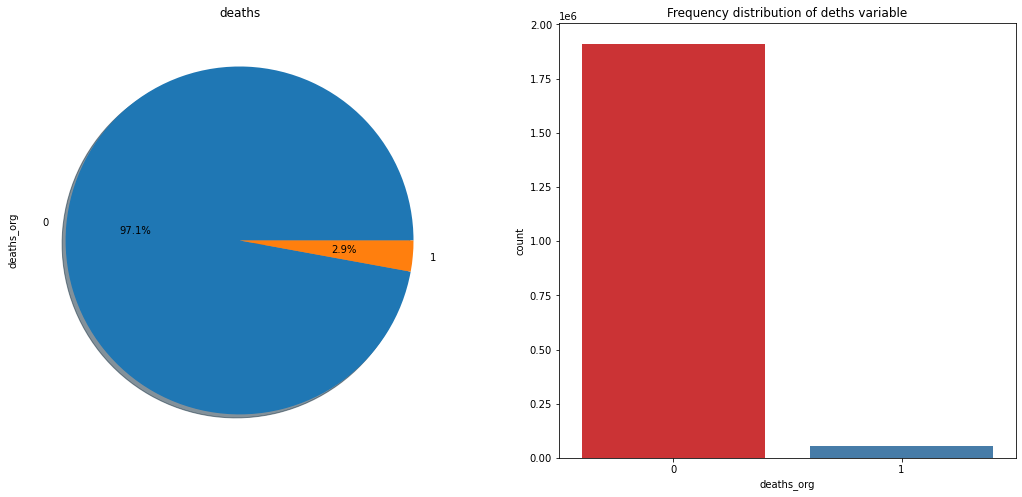

In [21]:


f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = covid['deaths_org'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('deaths')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="deaths_org", data=covid, palette="Set1")
ax[1].set_title("Frequency distribution of deths variable")

plt.show()

# Darstellungen für die Totesfälle, genesene Fälle und aktive Fälle pro Bundesland

In [22]:
de =pd.read_csv(r'C:\Users\Emad\Desktop\Studium\masterprojekt\datenbank\kaggle_de_03-01-2021\12.01\archive (24)\covid_de.csv')
state_df = de.groupby(['state','date']).sum().reset_index()
state_df["state"].unique()
state_df["state"] = state_df["state"].str.replace("Baden-Wuerttemberg","Baden").str.replace("Mecklenburg-Vorpommern","Mecklenburg").str.replace("Nordrhein-Westfalen","Nordrhein").str.replace("Sachsen-Anhalt","Sachsen_A").str.replace("Schleswig-Holstein","Schleswig").str.replace("Rheinland-Pfalz","Rheinland")
listofstates = state_df["state"].unique()

## create for loop to split dfs by state for analysis 

listofdfs = []
for state in listofstates:
    locals()['df_'+ state] = state_df[(state_df.state== state)]
    listofdfs.append(['df_'+ state][0])
listofdfs=[df_Baden,
              df_Bayern,
              df_Berlin,
              df_Brandenburg,
              df_Bremen,
              df_Hamburg,
              df_Hessen,
              df_Mecklenburg,
              df_Niedersachsen,
              df_Nordrhein,
              df_Rheinland,
              df_Saarland,
              df_Sachsen,
              df_Sachsen_A,
              df_Schleswig,
              df_Thueringen]

def cumsum(de):
    de['cumsum_deaths'] = de["deaths"].cumsum()
    de['cumsum_cases'] = de["cases"].cumsum()
    de['cumsum_recovered'] = de["recovered"].cumsum()
    
for i in listofdfs:
    cumsum(i)  
    
merged_df = pd.concat([ df_Baden,
                        df_Bayern,
                        df_Berlin,
                        df_Brandenburg,
                        df_Bremen,
                        df_Hamburg,
                        df_Hessen,
                        df_Mecklenburg,
                        df_Niedersachsen,
                        df_Nordrhein,
                        df_Rheinland,
                        df_Saarland,
                        df_Sachsen,
                        df_Sachsen_A,
                        df_Schleswig,
                        df_Thueringen], axis=0)


In [23]:
import plotly.express as px
fig = px.line(merged_df,
              x="date",
              y="cumsum_cases",
              color="state",
              line_group="state",
              hover_name="state")
fig.update_layout(
              title="die Fälle pro Bundesland",
              yaxis_title="cases")

fig.show()

In [24]:
fig = px.line(merged_df,
              x="date",
              y="cumsum_deaths",
              color="state",
              line_group="state",
              hover_name="state")
fig.update_layout(
              title="die Totesfälle pro Bundesland",
              yaxis_title="deaths"
)
fig.show()

In [25]:
fig = px.line(merged_df,
              x="date",
              y="cumsum_recovered",
              color="state",
              hover_name="state")
fig.update_layout(
              title="die genesenen Fälle pro Bundesland",
              yaxis_title="recovered"
          )

fig.show()

# TodesFälle / genesene Fälle nach Altergruppen in DE

<AxesSubplot:title={'center':'TodesFälle nach Altergruppen in DE'}, xlabel='age_group_org', ylabel='Todesfälle'>

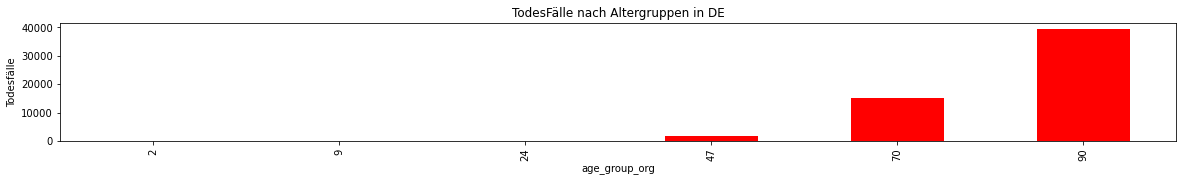

In [26]:
import matplotlib.pyplot as plt
age_group =covid.groupby(['age_group_org']).sum()
deaths_age_group=age_group['deaths_org']
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(4,1,1)
ax.set_ylabel('Todesfälle')
ax.set_title('TodesFälle nach Altergruppen in DE')
deaths_age_group.plot(kind='bar',color='red')

<AxesSubplot:title={'center':'Genesene Fälle in DE nach  Altergruppen'}, xlabel='age_group_org', ylabel='Genesene Fälle'>

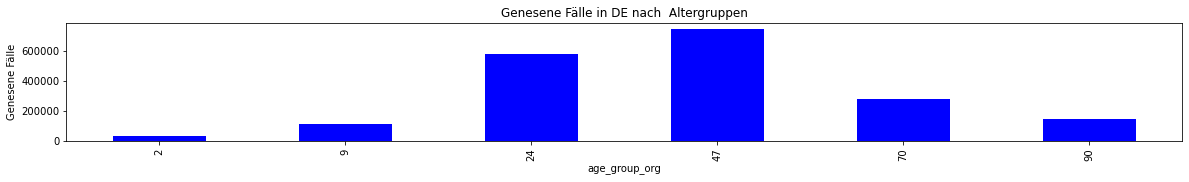

In [27]:
import matplotlib.pyplot as plt
age_group =covid.groupby(['age_group_org']).sum()
deaths_age_group=age_group['recovered_org']
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(4,1,1)
ax.set_ylabel('Genesene Fälle')
ax.set_title('Genesene Fälle in DE nach  Altergruppen')
deaths_age_group.plot(kind='bar',color='blue')

In [28]:
cov_gen = de.groupby(['gender']).sum().reset_index()
cov_gen

gender    cases  deaths  recovered
0      F  1158239   27394    1003642
1      M  1029037   28986     893071

# Altersverteilung nach Geschlecht und Altergruppen in DE

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
gender_age = demo.groupby(['gender', 'age_group']).sum().reset_index()
fig = px.bar(gender_age, y='population', x='gender', color='age_group')
fig.update_layout(title='Altersverteilung nach Altergruppen')
fig.show()

In [30]:
state_age = demo.groupby(['state', 'age_group']).sum().reset_index()
fig = px.bar(state_age, y='population', x='state', color='age_group')
fig.update_layout(title='Altersverteilung nach Altergruppen pro Bundesland')
fig.show()

In [31]:
df.head()

state                          county  age_group  \
261873  Mecklenburg-Vorpommern                      LK Rostock         90   
260174  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70   
260175  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70   
260176  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70   
260177  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte         70   

       gender        date  cases  deaths  recovered  county_cod  state_cod  
261873      F  2021-01-27      5       0          0          16          0  
260174      F  2020-12-16      8       1          7          10          0  
260175      F  2020-12-17     11       0         11          10          0  
260176      F  2020-12-18      3       0          3          10          0  
260177      F  2020-12-19      5       0          5          10          0

# Anzahl der TodesFälle / genesenen Fälle / aktuellen Fälle in DE pro Tag  bis 30.01.2021

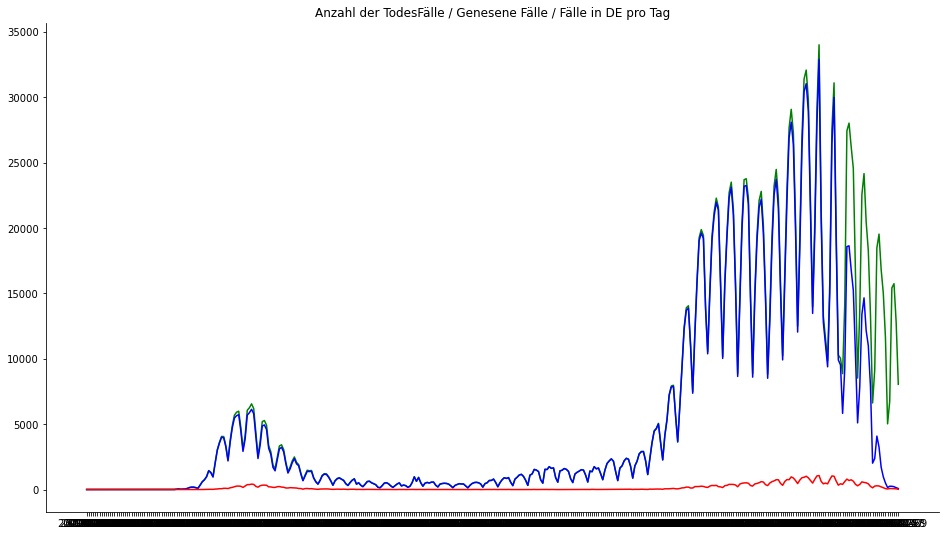

In [32]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_cases["date"],
        df_cases["cases"],
        color="g");
ax.plot(df_cases["date"],
        df_cases["recovered"],
        color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der TodesFälle / Genesene Fälle / Fälle in DE pro Tag");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);


In [33]:
covid

state_org                      county_org  \
0        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
1        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
2        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
3        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
4        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
...                         ...                             ...   
1967731                  Berlin                SK Berlin Pankow   
1967732                  Berlin                SK Berlin Pankow   
1967733                  Berlin                SK Berlin Pankow   
1967734                  Berlin             SK Berlin Neukoelln   
1967735                  Berlin             SK Berlin Neukoelln   

         age_group_org gender_org    date_org  cases_org  deaths_org  \
0                   70          F  2020-12-16          8           1   
1                   70          F  2020-12-16          8           0   
2                   70          F  2020-12-16          8           0   
3                   70          F  2020-12-16          8           0   
4                   70          F  2020-12-16          8           0   
...                ...        ...         ...        ...         ...   
1967731             90          F  2021-01-05         23           0   
1967732             90          F  2021-01-05         23           0   
1967733             90          F  2021-01-05         23           0   
1967734              2          M  2020-11-01          2           0   
1967735              2          M  2020-11-01          2           0   

         recovered_org  county_cod_org  state_cod_org  
0                    0              10              0  
1                    1              10              0  
2                    1              10              0  
3                    1              10              0  
4                    1              10              0  
...                ...             ...            ...  
1967731              1             403             15  
1967732              1             403             15  
1967733              1             403             15  
1967734              1             411             15  
1967735              1             411             15  

[1967736 rows x 10 columns]

# Analyse der Anteil der Todesfälle und genesenen Fälle in Bezug des Geschlechtes und der Altergruppen

In [34]:
cov_gen = covid.groupby(['gender_org']).sum().reset_index()
cov_gen

gender_org  age_group_org  cases_org  deaths_org  recovered_org  \
0          F       48106819   16276191       27463        1010804   
1          M       40049466   12784705       29075         900394   

   county_cod_org  state_cod_org  
0       258775222        8848441  
1       235484874        7996587

In [35]:
cov_age = df.groupby(['age_group']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths"]/cov_age["cases"]* 100,1)
cov_age

age_group   cases  deaths  recovered  county_cod  state_cod  \
0          2   39132       8      35168     6719526     231081   
1          9  123338      11     113703    13196874     454482   
2         24  641257      76     581581    28748635     984685   
3         47  837540    1822     749704    30118348    1039286   
4         70  338542   15056     281336    21239952     740802   
5         90  224902   39565     149637    14504148     505941   

   death_percentage  
0               0.0  
1               0.0  
2               0.0  
3               0.2  
4               4.4  
5              17.6

In [36]:
cov_age = covid.groupby(['age_group_org']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths_org"]/cov_age["cases_org"]* 100,1)
cov_age

age_group_org  cases_org  deaths_org  recovered_org  county_cod_org  \
0              2      70474           8          35168         8974656   
1              9     505526          11         113703        29330767   
2             24    9245239          76         581584       153713754   
3             47   14774977        1822         749709       186836707   
4             70    2539653       15056         281356        70585479   
5             90    1925027       39565         149678        44818733   

   state_cod_org  death_percentage  
0         306002               0.0  
1         992116               0.0  
2        5142121               0.0  
3        6405727               0.0  
4        2456922               0.6  
5        1542140               2.1

<AxesSubplot:title={'center':'deaths'}>

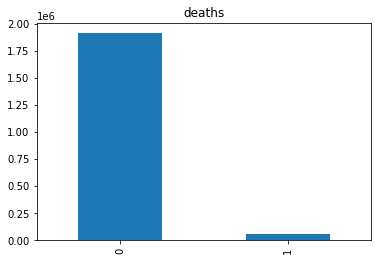

In [37]:
covid["deaths_org"].value_counts().plot.bar(title='deaths')

<AxesSubplot:title={'center':'gender'}>

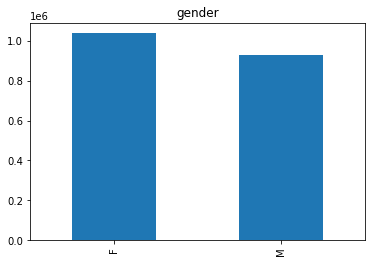

In [38]:
REASON_count= covid["gender_org"].value_counts().rename_axis('gender').reset_index(name='Total Count')
covid["gender_org"].value_counts().plot.bar(title='gender')

<AxesSubplot:title={'center':'age_group'}>

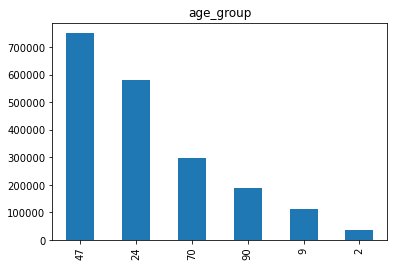

In [39]:
REASON_count= covid["age_group_org"].value_counts().rename_axis('gender').reset_index(name='Total Count')
covid["age_group_org"].value_counts().plot.bar(title='age_group')

<AxesSubplot:title={'center':'age_group vs deaths'}, xlabel='age_group_org'>

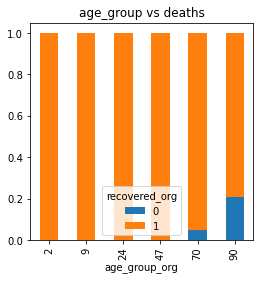

In [40]:
gender=pd.crosstab(covid['age_group_org'],covid['recovered_org'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='age_group vs deaths', figsize=(4,4))

In [41]:
print('Current count of patients:',covid['cases_org'].count())
print('Number of Dead Patients:', covid[covid['deaths_org']==1]['deaths_org'].count())
print('Number of Recovered Patients:',covid[covid['recovered_org']==1]['deaths_org'].count())

Current count of patients: 1967736
Number of Dead Patients: 56538
Number of Recovered Patients: 1911198


In [42]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967736 entries, 0 to 1967735
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   state_org       object
 1   county_org      object
 2   age_group_org   int64 
 3   gender_org      object
 4   date_org        object
 5   cases_org       int64 
 6   deaths_org      int64 
 7   recovered_org   int64 
 8   county_cod_org  int64 
 9   state_cod_org   int64 
dtypes: int64(6), object(4)
memory usage: 150.1+ MB


# Die Spalten 'cases_org', 'recovered_org' werden gelöscht

In [43]:
covid.drop(['cases_org', 'recovered_org'], axis=1, inplace=True)

# Codierung der Spalten "date_org" ung "gender_org"

In [75]:
le3=LabelEncoder()
le3.fit(covid['gender_org'])
covid['geschlecht_org']=le3.transform(covid['gender_org'])
covid['date_org'] = pd.to_datetime(covid['date_org'])
covid['date_org'] = covid[['date_org']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [76]:
covid.head(1)

state_org     county_org  age_group_org gender_org  date_org  \
186267  Niedersachsen  SK Osnabrueck             24          F         1   

        deaths_org  scaled_date  scaled_age  scaled_gender  scaled_county  \
186267           0      0.97201        0.25            0.0       0.861314   

        scaled_state  geschlecht_org  
186267      0.266667               0

# Visualisieren Sie Todesfälle / Genesung mit Altersvariablen

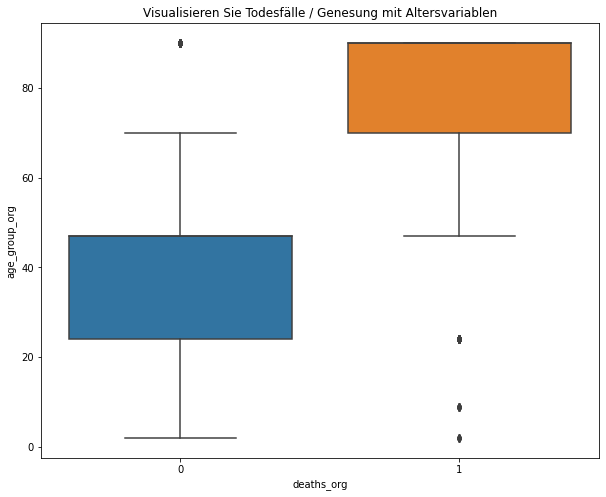

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="deaths_org", y="age_group_org", data=covid)
ax.set_title("Visualisieren Sie Todesfälle / Genesung mit Altersvariablen")
plt.show()

In [47]:
covid.head(1)

state_org                      county_org  age_group_org  \
0  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   

  gender_org    date_org  deaths_org  county_cod_org  state_cod_org  \
0          F  1608076800           1              10              0   

   geschlecht_org  
0               0

# Skalierung der Eingabevariablen "scaled_date","scaled_age","scaled_gender","scaled_county" und "scaled_state"

In [48]:
min_max_scaler = MinMaxScaler()
covid[["scaled_date","scaled_age","scaled_gender","scaled_county","scaled_state"]] = min_max_scaler.fit_transform(covid[["date_org","age_group_org","geschlecht_org","county_cod_org","state_cod_org"]])

In [49]:
covid.head(5)

state_org                      county_org  age_group_org  \
0  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   
1  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   
2  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   
3  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   
4  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   

  gender_org    date_org  deaths_org  county_cod_org  state_cod_org  \
0          F  1608076800           1              10              0   
1          F  1608076800           0              10              0   
2          F  1608076800           0              10              0   
3          F  1608076800           0              10              0   
4          F  1608076800           0              10              0   

   geschlecht_org  scaled_date  scaled_age  scaled_gender  scaled_county  \
0               0     0.888041    0.772727            0.0       0.024331   
1               0     0.888041    0.772727            0.0       0.024331   
2               0     0.888041    0.772727            0.0       0.024331   
3               0     0.888041    0.772727            0.0       0.024331   
4               0     0.888041    0.772727            0.0       0.024331   

   scaled_state  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [50]:
covid.drop(['county_cod_org','state_cod_org','geschlecht_org'], axis=1, inplace=True)

In [51]:
covid_feature= pd.DataFrame(covid,columns=['scaled_age', 'scaled_state','scaled_county','deaths_org','scaled_date','scaled_gender'])

In [52]:
covid

state_org                      county_org  \
0        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
1        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
2        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
3        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
4        Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte   
...                         ...                             ...   
1967731                  Berlin                SK Berlin Pankow   
1967732                  Berlin                SK Berlin Pankow   
1967733                  Berlin                SK Berlin Pankow   
1967734                  Berlin             SK Berlin Neukoelln   
1967735                  Berlin             SK Berlin Neukoelln   

         age_group_org gender_org    date_org  deaths_org  scaled_date  \
0                   70          F  1608076800           1     0.888041   
1                   70          F  1608076800           0     0.888041   
2                   70          F  1608076800           0     0.888041   
3                   70          F  1608076800           0     0.888041   
4                   70          F  1608076800           0     0.888041   
...                ...        ...         ...         ...          ...   
1967731             90          F  1609804800           0     0.938931   
1967732             90          F  1609804800           0     0.938931   
1967733             90          F  1609804800           0     0.938931   
1967734              2          M  1604188800           0     0.773537   
1967735              2          M  1604188800           0     0.773537   

         scaled_age  scaled_gender  scaled_county  scaled_state  
0          0.772727            0.0       0.024331           0.0  
1          0.772727            0.0       0.024331           0.0  
2          0.772727            0.0       0.024331           0.0  
3          0.772727            0.0       0.024331           0.0  
4          0.772727            0.0       0.024331           0.0  
...             ...            ...            ...           ...  
1967731    1.000000            0.0       0.980535           1.0  
1967732    1.000000            0.0       0.980535           1.0  
1967733    1.000000            0.0       0.980535           1.0  
1967734    0.000000            1.0       1.000000           1.0  
1967735    0.000000            1.0       1.000000           1.0  

[1967736 rows x 11 columns]

In [54]:
covid.head(1)

state_org                      county_org  age_group_org  \
0  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   

  gender_org    date_org  deaths_org  scaled_date  scaled_age  scaled_gender  \
0          F  1608076800           1     0.888041    0.772727            0.0   

   scaled_county  scaled_state  
0       0.024331           0.0

# Correlation matrix

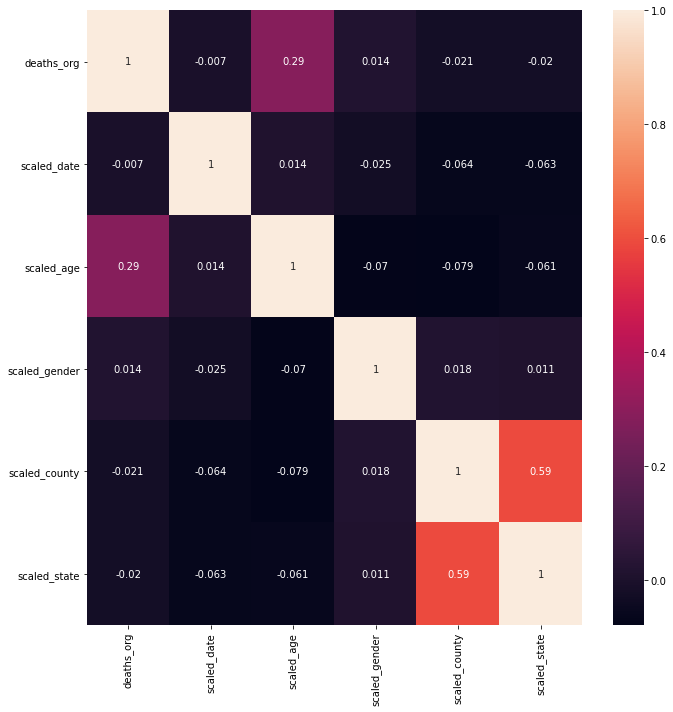

<Figure size 432x288 with 0 Axes>

In [57]:
# Calculate correlation matrix
corr = covid.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()

# RandomForestClassifier mit dem Imbalanced-Datensatz 

Accuracy of test_data:  0.9653429118540292
Accuracy of train_data:  0.9786522853336694
*** Evaluation metrics for test dataset ***

Recall Score:  0.13100927748102334
Precision Score:  0.28462360665750497
F1 Score:  0.17942917649323772
Accuracy:  0.9653429118540292


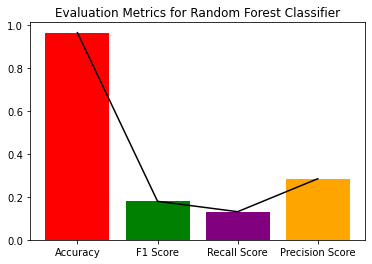


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     0
('Model roc score:', 56.00000000000001)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    477706
           1       0.28      0.13      0.18     14228

    accuracy                           0.97    491934
   macro avg       0.63      0.56      0.58    491934
weighted avg       0.95      0.97      0.96    491934

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
feature_importances:  
 scaled_date      0.381162
scaled_county    0.319034
scaled_age       0.239019
scaled_state     0.044377
scaled_gender    0.016407
dtype: float64
('Model roc score:', 56.00000000000001)


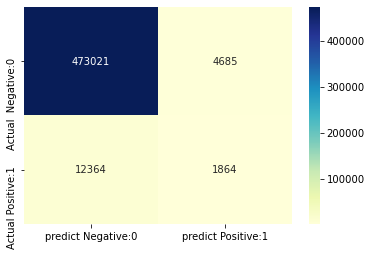

Pred 0(recovered)            Pred 1(deaths)
True 0(recovered)  TN = 473021 (TNR = 99.02%)   FP = 4685 (FPR = 0.98%)
True 1(deaths)      FN = 12364 (FNR = 86.90%)  TP = 1864 (TPR = 13.10%)

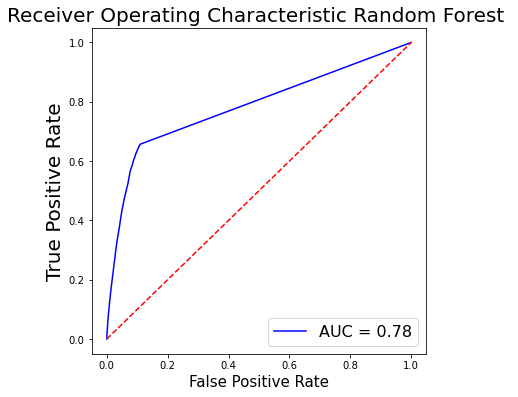

In [58]:
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1)

rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('feature_importances:  \n',feature_scores)
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

In [59]:
covid.head(1)

state_org                      county_org  age_group_org  \
0  Mecklenburg-Vorpommern  LK Mecklenburgische Seenplatte             70   

  gender_org    date_org  deaths_org  scaled_date  scaled_age  scaled_gender  \
0          F  1608076800           1     0.888041    0.772727            0.0   

   scaled_county  scaled_state  
0       0.024331           0.0

# Verteilung der gestobenen Menschen (orange) und genesenen Fälle (blau) nach Altergruppe

<AxesSubplot:xlabel='scaled_date', ylabel='age_group_org'>

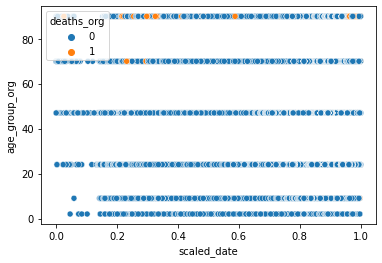

In [60]:
import seaborn as sns
sns.scatterplot(covid['scaled_date'],covid['age_group_org'],hue=covid['deaths_org'])


In [61]:
np.bincount(y_test)

array([477706,  14228], dtype=int64)

# Mithilfe der Funktion wird das beste Model, bzw beste Accuracy identifiziert 
Best Score: 0.9674281213076015, Param: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 
                                        'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 30, 'n_jobs': 4}
Aber Ergebnisse der metrichen Performance sind schelcht wie Recall un F1_Score, deswegen werden die Hyperparameter manuell
geändert.

# Scaled_state wird auch entfernt

Accuracy of test_data:  0.9713965694585046
Accuracy of train_data:  0.9719298388266177
*** Evaluation metrics for test dataset ***

Recall Score:  0.02607534439134102
Precision Score:  0.6341880341880342
F1 Score:  0.050091136164180115
Accuracy:  0.9713965694585046


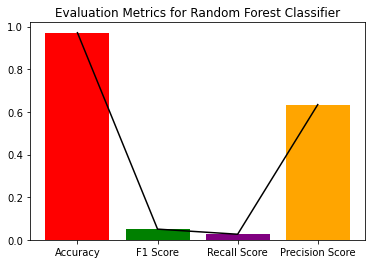


	Table 3

         deaths_org  pred
834693            1     0
1759959           0     0
411293            0     0
491953            0     0
1195763           0     0
('Model roc score:', 51.0)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    477706
           1       0.63      0.03      0.05     14228

    accuracy                           0.97    491934
   macro avg       0.80      0.51      0.52    491934
weighted avg       0.96      0.97      0.96    491934

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
feature_importances:  
 scaled_age       0.678414
scaled_date      0.142101
scaled_county    0.131280
scaled_gender    0.048205
dtype: float64
('Model roc score:', 51.0)


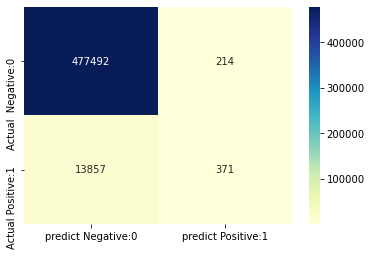

Pred 0(recovered)          Pred 1(deaths)
True 0(recovered)  TN = 477492 (TNR = 99.96%)  FP = 214 (FPR = 0.04%)
True 1(deaths)      FN = 13857 (FNR = 97.39%)  TP = 371 (TPR = 2.61%)

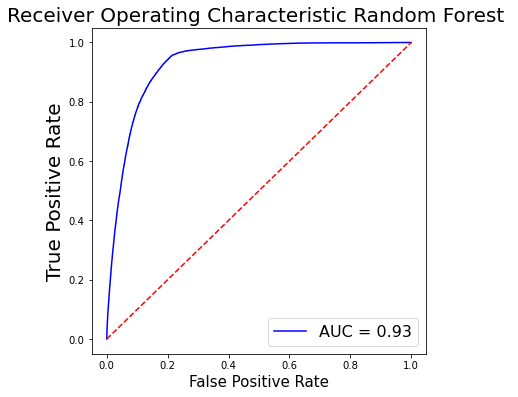

In [62]:
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)


rfc = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 15, 
                             min_samples_leaf= 10, min_samples_split=30, n_estimators= 30
                            ).fit(X_train, y_train)

pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('feature_importances:  \n',feature_scores)
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

# Datensatz ist unbalanced Datei , deswegen werden verschiedene Resampling-Methode untersucht und verglichen

Accuracy of test_data:  0.9643583077286694
Accuracy of train_data:  0.9632868510202474
*** Evaluation metrics for test dataset ***

Recall Score:  0.978013646702047
Precision Score:  0.9518539014941892
F1 Score:  0.9647564737776948
Accuracy:  0.9643583077286694


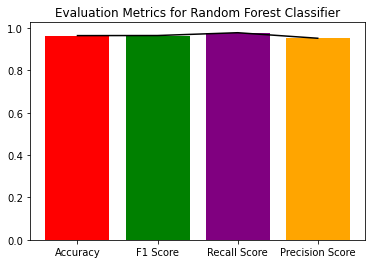


	Table 3

       deaths_org  pred
67318           1     1
81967           1     1
4199            0     0
28406           0     0
53624           1     1
('Model roc score:', 96.0)
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     10603
           1       0.95      0.98      0.96     10552

    accuracy                           0.96     21155
   macro avg       0.96      0.96      0.96     21155
weighted avg       0.96      0.96      0.96     21155

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
feature_importances:  
 scaled_age       0.627868
scaled_county    0.219605
scaled_date      0.146201
scaled_gender    0.006325
dtype: float64
('Model roc score:', 96.0)


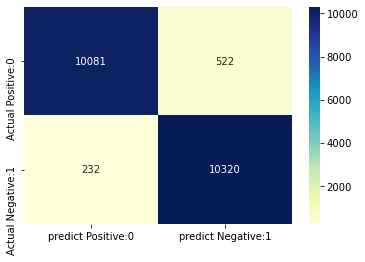

Pred 0(recovered)             Pred 1(deaths)
True 0(recovered)  TN = 10081 (TNR = 95.08%)     FP = 522 (FPR = 4.92%)
True 1(deaths)        FN = 232 (FNR = 2.20%)  TP = 10320 (TPR = 97.80%)

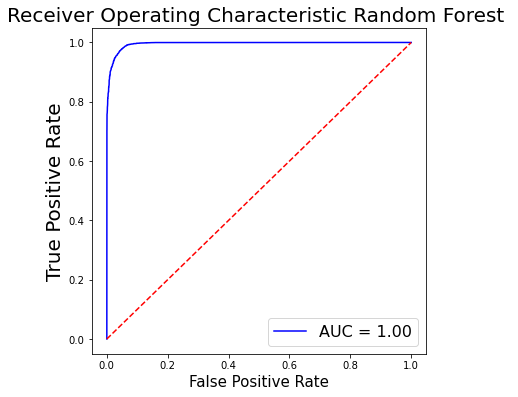

In [63]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier(n_estimators=42)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_train_rus, y_train_rus, test_size = 0.25, random_state = 42)
rfc.fit(X_train_rus, y_train_rus)
pred = np.array(rfc.predict(X_test_res))
pred_train = np.array(rfc.predict(X_train_res))
print('Accuracy of test_data: ', accuracy_score(y_test_res, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_res, pred_train))

recall = rs(y_test_res,pred)
precision = ps(y_test_res,pred)
f1 = fs(y_test_res,pred)
ma = rfc.score(X_test_res,y_test_res)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test_res)
a['pred']= rfc.predict(X_test_res)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print(('Model roc score:',100*roc_auc_score(y_test_res,pred).round(2)))
print(classification_report(y_test_res, pred))
cnf_matrix=confusion_matrix(y_test_res, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Positive:0', 'predict Negative:1'], 
                            index=['Actual Positive:0', 'Actual Negative:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('feature_importances:  \n',feature_scores)
print(('Model roc score:',100*roc_auc_score(y_test_res,pred).round(2)))
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test_res)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test_res, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test_res,pred)

# Ausführung RFC mit RandomUnderSampler 

Accuracy of test_data:  0.825671736452451
Accuracy of train_data:  0.9648310092176791
Recall: 0.861
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 84.0)
              precision    recall  f1-score   support

           0       0.99      0.82      0.90    477706
           1       0.13      0.86      0.22     14228

    accuracy                           0.83    491934
   macro avg       0.56      0.84      0.56    491934
weighted avg       0.97      0.83      0.88    491934

Recall Score:  0.860697216755693
Precision Score:  0.12753327362479433
F1 Score:  0.2221496598639456
Accuracy:  0.825671736452451


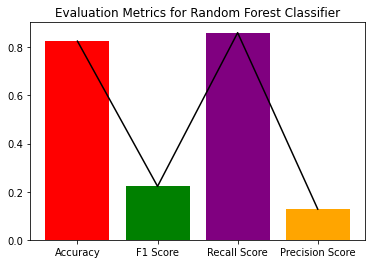


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.628234
scaled_county    0.224705
scaled_date      0.140773
scaled_gender    0.006289
dtype: float64
******************************** confusion matrix *****************************




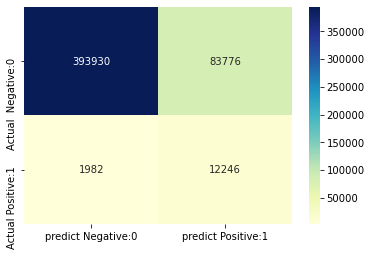

Pred 0(recovered)             Pred 1(deaths)
True 0(recovered)  TN = 393930 (TNR = 82.46%)  FP = 83776 (FPR = 17.54%)
True 1(deaths)       FN = 1982 (FNR = 13.93%)  TP = 12246 (TPR = 86.07%)

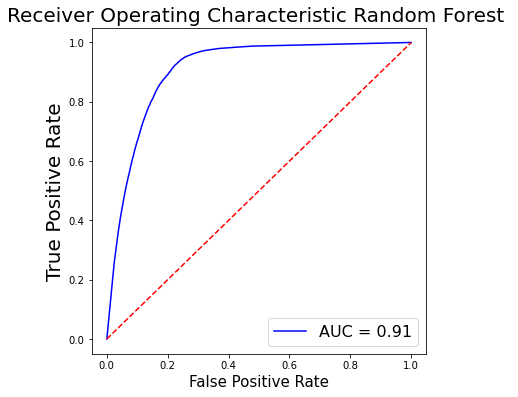

In [64]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier()
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
rfc.fit(X_train_rus, y_train_rus)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# die beste Hyperparameter werden mithilfe der GridSearchCV-Funktion ausgesucht

# beste Hyperparameter: bootstrap= True, criterion= 'entropy', max_depth= 10, min_samples_leaf= 15, min_samples_split=10, n_estimators= 10

Accuracy of test_data:  0.8080860440628215
Accuracy of train_data:  0.8775466792720397
Recall: 0.941
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 87.0)
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    477706
           1       0.13      0.94      0.22     14228

    accuracy                           0.81    491934
   macro avg       0.56      0.87      0.56    491934
weighted avg       0.97      0.81      0.87    491934

Recall Score:  0.941453472026989
Precision Score:  0.12522085425021734
F1 Score:  0.22104142773455224
Accuracy:  0.8080860440628215


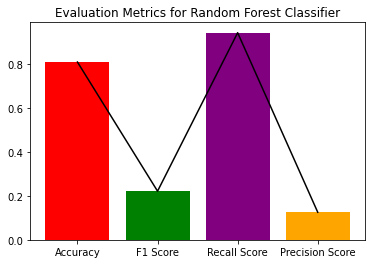


	Table 3

         deaths_org  pred
834693            1     1
1759959           0     0
411293            0     0
491953            0     0
1195763           0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.917929
scaled_date      0.050165
scaled_county    0.020312
scaled_gender    0.011594
dtype: float64
******************************** confusion matrix *****************************




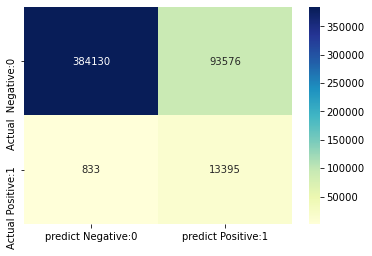

Pred 0(recovered)             Pred 1(deaths)
True 0(recovered)  TN = 384130 (TNR = 80.41%)  FP = 93576 (FPR = 19.59%)
True 1(deaths)         FN = 833 (FNR = 5.85%)  TP = 13395 (TPR = 94.15%)

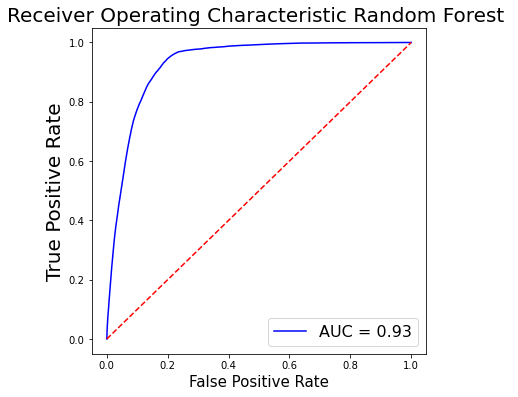

In [67]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, 
                             min_samples_leaf= 15, min_samples_split=10, n_estimators= 10)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
rfc.fit(X_train_rus, y_train_rus)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

In [68]:
covid.deaths_org.value_counts()

0    1911198
1      56538
Name: deaths_org, dtype: int64

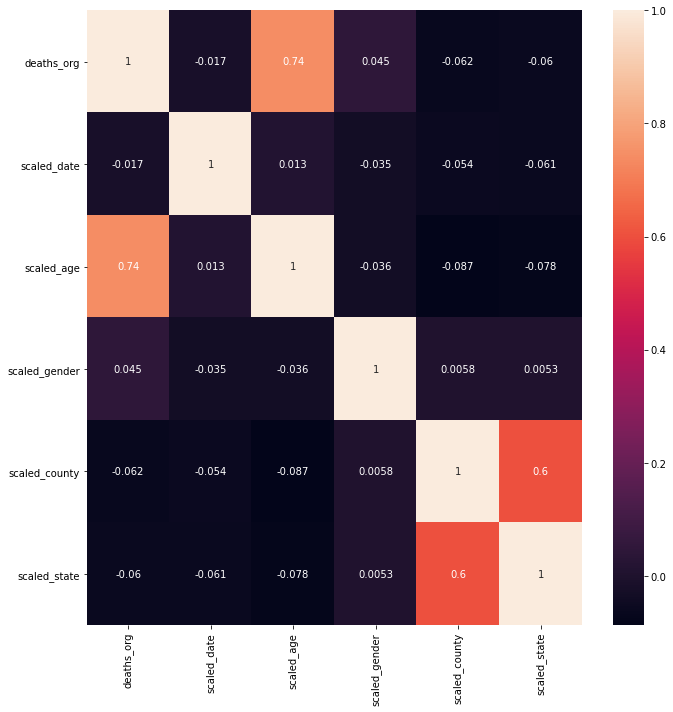

<Figure size 432x288 with 0 Axes>

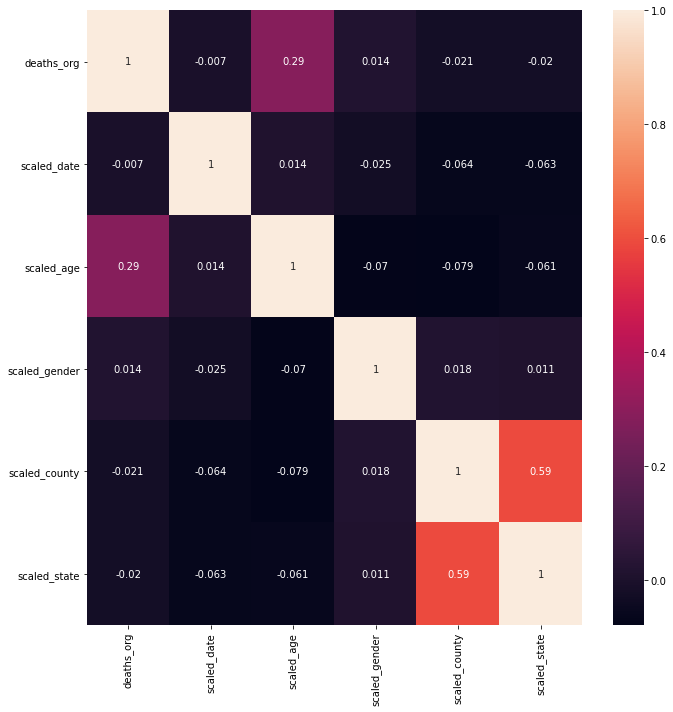

<Figure size 432x288 with 0 Axes>

In [69]:
covid = covid.sample(frac=1)

# amount of deaths classes 56538 rows.
deaths_df = covid.loc[covid['deaths_org'] == 1][:56538]
recovered_df = covid.loc[covid['deaths_org'] == 0][:56538]

normal_distributed_df = pd.concat([deaths_df, recovered_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

corr = new_df.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show() 
plt.clf()
corr = covid.drop(['state_org','county_org','date_org','age_group_org','gender_org'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()  
plt.clf()

In [70]:
new_df.deaths_org.value_counts()

1    56538
0    56538
Name: deaths_org, dtype: int64

# RandomOverSampler

Accuracy of test_data:  0.8026462899494647
Accuracy of train_data:  0.8756710816992689
Recall: 0.949
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 87.0)
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    478064
           1       0.12      0.95      0.21     13870

    accuracy                           0.80    491934
   macro avg       0.56      0.87      0.55    491934
weighted avg       0.97      0.80      0.87    491934

Recall Score:  0.9494592645998559
Precision Score:  0.12020665796463811
F1 Score:  0.21339620654173044
Accuracy:  0.8026462899494647


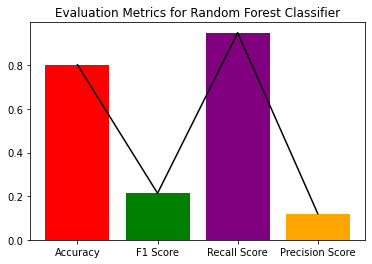


	Table 3

         deaths_org  pred
1137335           0     0
942973            0     1
750989            0     0
1672789           0     0
1386582           0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.928073
scaled_date      0.048106
scaled_gender    0.012540
scaled_county    0.011281
dtype: float64
******************************** confusion matrix *****************************




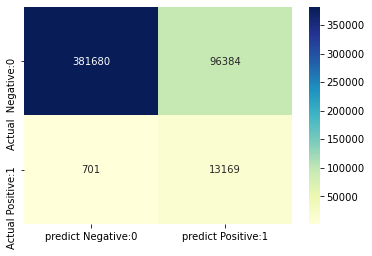

Pred 0(recovered)             Pred 1(deaths)
True 0(recovered)  TN = 381680 (TNR = 79.84%)  FP = 96384 (FPR = 20.16%)
True 1(deaths)         FN = 701 (FNR = 5.05%)  TP = 13169 (TPR = 94.95%)

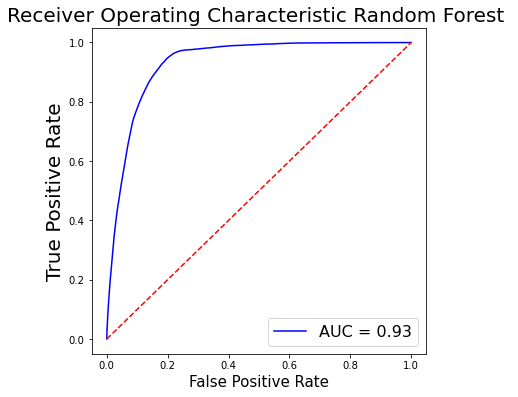

In [71]:
ros =RandomOverSampler()
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, 
                             min_samples_leaf= 15, min_samples_split=10, n_estimators= 10)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
rfc.fit(X_train_ros, y_train_ros)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_ros))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_ros, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# SMOTE

Accuracy of test_data:  0.8052157403228889
Accuracy of train_data:  0.8780979308285198
Recall: 0.945
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 87.0)
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    478064
           1       0.12      0.95      0.21     13870

    accuracy                           0.81    491934
   macro avg       0.56      0.87      0.55    491934
weighted avg       0.97      0.81      0.87    491934

Recall Score:  0.9450612833453497
Precision Score:  0.1211829855686115
F1 Score:  0.2148200955447938
Accuracy:  0.8052157403228889


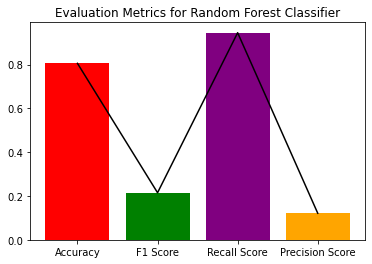


	Table 3

         deaths_org  pred
1137335           0     0
942973            0     1
750989            0     0
1672789           0     0
1386582           0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_age       0.936553
scaled_date      0.041404
scaled_gender    0.012259
scaled_county    0.009784
dtype: float64
******************************** confusion matrix *****************************




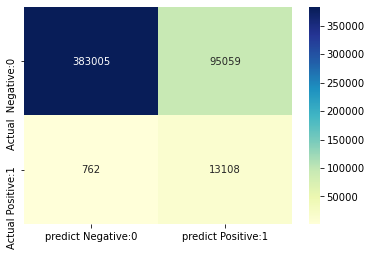

Pred 0(recovered)             Pred 1(deaths)
True 0(recovered)  TN = 383005 (TNR = 80.12%)  FP = 95059 (FPR = 19.88%)
True 1(deaths)         FN = 762 (FNR = 5.49%)  TP = 13108 (TPR = 94.51%)

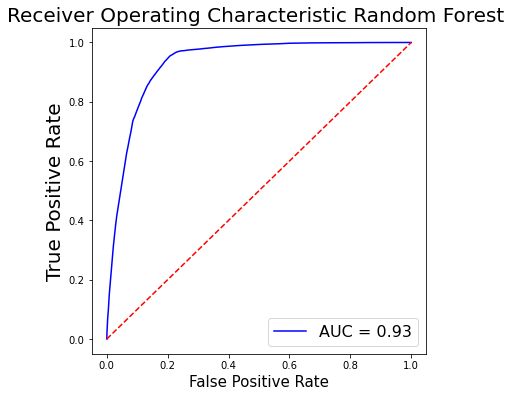

In [72]:
somte =SMOTE(random_state=42)
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, 
                             min_samples_leaf= 15, min_samples_split=10, n_estimators= 10)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)

X_train_som, y_train_som = somte.fit_sample(X_train, y_train)
rfc.fit(X_train_som, y_train_som)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_som))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_som, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# NearMiss

Accuracy of test_data:  0.09741144137221659
Accuracy of train_data:  0.7001031217774445
Recall: 0.637
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 36.0)
              precision    recall  f1-score   support

           0       0.89      0.08      0.15    478064
           1       0.02      0.64      0.04     13870

    accuracy                           0.10    491934
   macro avg       0.45      0.36      0.09    491934
weighted avg       0.86      0.10      0.15    491934

Recall Score:  0.6367700072098054
Precision Score:  0.019722738316421323
F1 Score:  0.03826043259587851
Accuracy:  0.09741144137221659


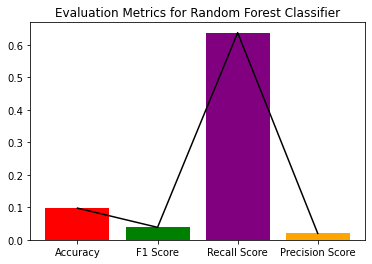


	Table 3

         deaths_org  pred
1137335           0     1
942973            0     1
750989            0     1
1672789           0     1
1386582           0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 scaled_date      0.479768
scaled_county    0.264029
scaled_age       0.143755
scaled_gender    0.112448
dtype: float64
******************************** confusion matrix *****************************




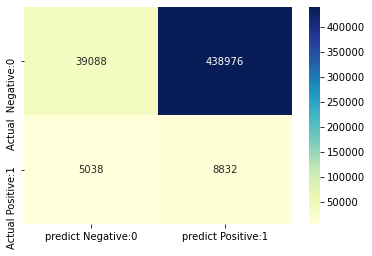

Pred 0(recovered)              Pred 1(deaths)
True 0(recovered)  TN = 39088 (TNR = 8.18%)  FP = 438976 (FPR = 91.82%)
True 1(deaths)     FN = 5038 (FNR = 36.32%)    TP = 8832 (TPR = 63.68%)

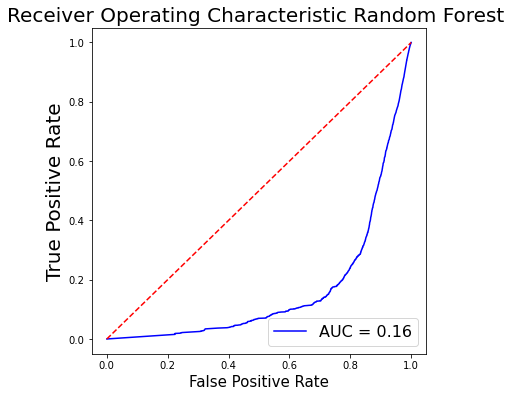

In [73]:
near =NearMiss()
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, 
                             min_samples_leaf= 15, min_samples_split=10, n_estimators= 10)
y = covid.deaths_org
X = covid.drop(['deaths_org'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)
X_train=X_train_input.drop(['state_org','county_org','date_org','age_group_org','gender_org','scaled_state'], axis=1)

X_train_near, y_train_near = near.fit_sample(X_train, y_train)
rfc.fit(X_train_near, y_train_near)
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_near))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_near, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

In [ ]:
colors = ['black' if v == 0 else 'red' if v == 1 else '#67a9cf' for v in y_train_near]
plt.scatter(X_train_near[:, 0], X_train_near[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("Near Output")
pass

# Es wird RandomForestClassifier mit imbalanced X_train/y_train ausgewählt, und es wird die Klassifikation von RFC auf imbalanced y_test geprüft.


# Es wird RandomForestClassifier mit balanced(RandomUnderSampler) X_train/y_train ausgewählt,und es wird die Klassifikation von RFC auf imbalanced y_test geprüft.

# Jupyter-file Masterprojekt_30_01_2021_Datenbank beschreibt die zwei ausgewählte Methode.